/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


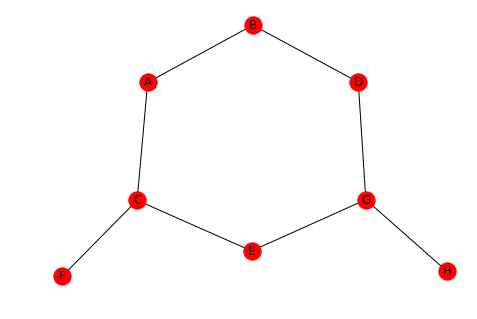

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
graph = {'A': {'B', 'C'},
         'B': {'A', 'D'},
         'C': {'A', 'E', 'F'},
         'D': {'B', 'G'},
         'E': {'C', 'G'},
         'F': {'C'},
         'G': {'D', 'E', 'H'},
         'H': {'G'}}

G=nx.Graph(graph)
plt.figure()
nx.draw(G, with_labels=True)
plt.show()

In [116]:
def dfs_iterative(graph, start):
    visited, stack = set(), [start]
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            print(vertex)
            stack.extend(graph[vertex] - visited)
            # print(stack)
    return visited

def dfs_recursive(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    for next_node in graph[start] - visited:
        dfs_recursive(graph, next_node, visited)   
    return visited

dfs_iterative(graph, 'A')
dfs_recursive(graph, 'A')

A
C
F
E
G
H
D
B
B
D
G
E
C
F
H
C


{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'}

In [102]:
def dfs_iterative_path(graph, start, goal):
    stack = [(start, [start])]
    while stack:
        (vertex, path) = stack.pop()
        for next_node in graph[start] - set(path):
            if next_node == goal:
                print(path + [next_node])
                return path + [next_node]
            else:
                stack.append((next_node, path + [next_node]))    
                start = next_node
    print(stack)                
    
def dfs_recursive_path(graph, start, goal, path=None):
    if path is None:
        path = [start]
    if start == goal:
        return path
    for next_node in graph[start] - set(path):
        return dfs_recursive_path(graph, next_node, goal, path + [next_node])
                
dfs_iterative_path(graph, 'B', 'E')    
dfs_recursive_path(graph, 'B', 'E')

['B', 'D', 'G', 'E']


['B', 'A', 'C', 'E']

In [13]:
def bfs(graph, start):
    visited, queue = set(), [start]
    while queue:
        vertex = queue.pop(0)
        if vertex not in visited:
            print(vertex)
            visited.add(vertex)
            queue.extend(graph[vertex] - visited)
    return visited

def bfs_recursive(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    for next_node in reversed(list(graph[start] - visited)):
        bfs_recursive(graph, next_node, visited)   
    return visited

def bfs_paths(graph, start, goal):
    queue = [(start, [start])]
    while queue:
        (vertex, path) = queue.pop(0)
        for next_node in graph[vertex] - set(path):
            if next_node == goal:
                return path + [next_node]
            else:
                queue.append((next_node, path + [next_node]))
    return queue

bfs(graph, 'A')
print(" ")
bfs_recursive(graph, 'A')
# dfs_iterative(graph, 'A')
# print(" ")
# dfs_recursive(graph, 'A')
# bfs_paths(graph, 'B', 'E')

A
C
B
E
F
D
G
H
 


{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'}